In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [14]:
# device config for GPU support

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
# hyper parameters

input_size = 784 # flattened 28*28
hidden_size = 100
num_classes = 10 # ten digits (0,1,..,8,9)
n_epochs = 2
batch_size = 100
learning_rate = 0.001

In [16]:
# MNIST dataset import

train = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    transform=transforms.ToTensor(),
    download=True
)

test = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    transform=transforms.ToTensor(),
)

train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples,labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


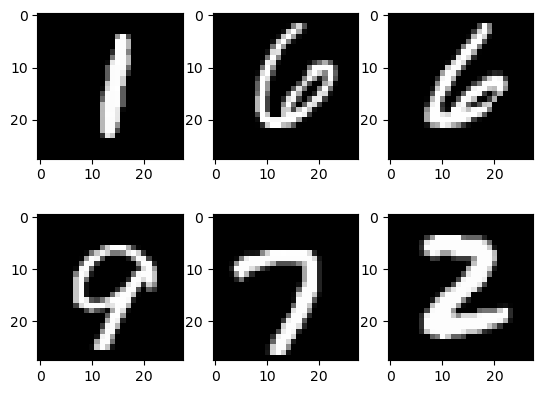

In [17]:
# plot data

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [24]:
# neural net model

class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [25]:
# loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
# training loop

n_total_steps = len(train_loader)

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # images are [100,1,28,28], want to convert to [100,784]
        images = images.reshape(-1,28*28).to(device) # push to gpu if available
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        loss.backward()
        
        # update weights
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{n_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.3f}')

epoch 1/2, step 100/600, loss = 0.349
epoch 1/2, step 200/600, loss = 0.344
epoch 1/2, step 300/600, loss = 0.259
epoch 1/2, step 400/600, loss = 0.353
epoch 1/2, step 500/600, loss = 0.243
epoch 1/2, step 600/600, loss = 0.206
epoch 2/2, step 100/600, loss = 0.175
epoch 2/2, step 200/600, loss = 0.191
epoch 2/2, step 300/600, loss = 0.249
epoch 2/2, step 400/600, loss = 0.180
epoch 2/2, step 500/600, loss = 0.267
epoch 2/2, step 600/600, loss = 0.267


In [ ]:
# testing

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images,labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs,1) # returns the value, index (class label)
        n_samples += labels.shape[0] # number of samples in current batch (100)
        n_correct += (predictions == labels).sum().item()
        
acc = (n_correct/n_samples) * 100.0
print(f'accuracy = {acc}')